In [37]:
import matplotlib.pyplot as plt
import numpy as np


In [38]:
#Data Generate x,y
def generateDataset(m):
    X= np.random.randn(m)*10
    noise= np.random.randn(m)
    y= 3*X + 1 + 5*noise
    return(X,y)


In [39]:
X,y= generateDataset(100)
print(X.shape, y.shape)


(100,) (100,)


In [40]:
def plotData(X,y, color='orange', title='Data'):
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.scatter(X,y, c=color)
    plt.show()

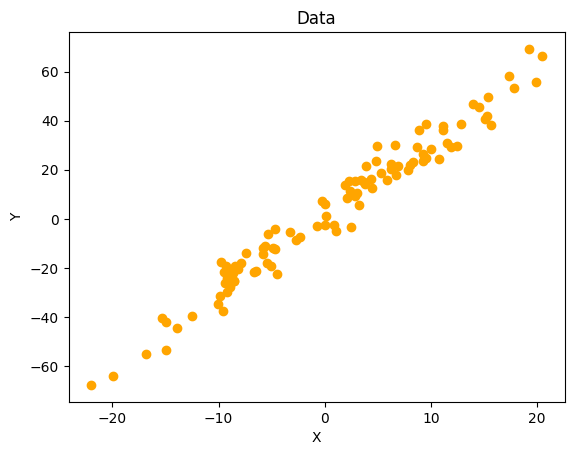

In [41]:
plotData(X,y)

In [42]:
print(X.mean(), X.std())


0.9209856955684771 9.661266441158318


In [43]:
#normalize the data
def normalizeData(X):
    X=(X-X.mean())/X.std()
    return X

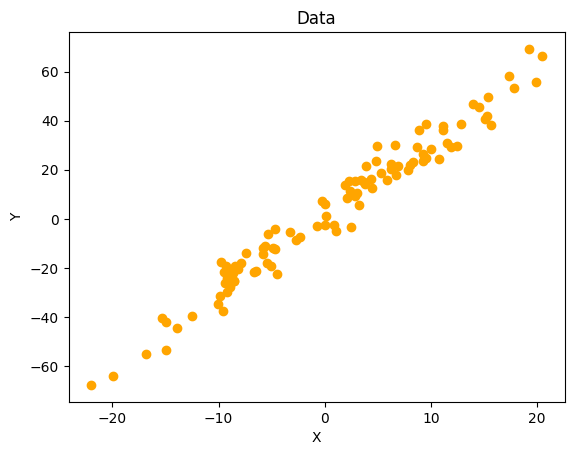

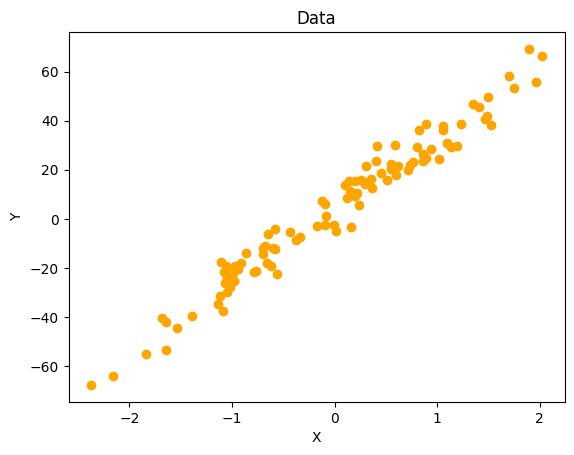

In [44]:
plotData(X,y)
X= normalizeData(X)
plotData(X,y)

In [45]:
print(X.std(), X.mean())

1.0 -1.9984014443252817e-17


In [46]:
def trainTestSplit(X, y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m, 2))  
    data[:, 0] = X  
    data[:, 1] = y  
    np.random.shuffle(data)
    
    split_index = int(m * split)
    XT=data[:split_index, 0]
    yT=data[: split_index, 1]
    xt=data[split_index: ,0]
    yt=data[split_index: , 1]
    
    
    return XT, yT, xt, yt


In [47]:
XT,yT,xt,yt = trainTestSplit(X, y)

In [48]:
print(XT.shape, yT.shape)
print(xt.shape, yt.shape)

(80,) (80,)
(20,) (20,)


<function matplotlib.pyplot.show(close=None, block=None)>

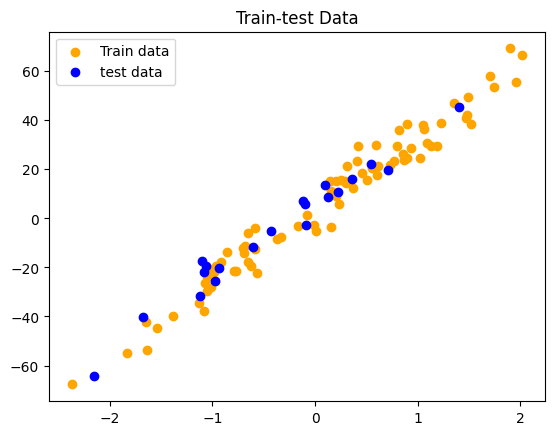

In [49]:
plt.scatter(XT, yT,color='orange', label='Train data')
plt.scatter(xt, yt, color='blue', label='test data')
plt.title('Train-test Data')
plt.legend()
plt.show

In [50]:
#Hypothesis
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e = e + (y[i] - y_i)**2
        
    return e / (2 * m)
        

In [16]:
# Modelling 
def hypothesis(X,theta):
    return theta[0] + theta[1]*X 

def error(X,y,theta):
    m = X.shape[0]
    e = 0 
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2 
    
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp) 
        grad[1] += (exp)*X[i]

    return grad/m 


def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

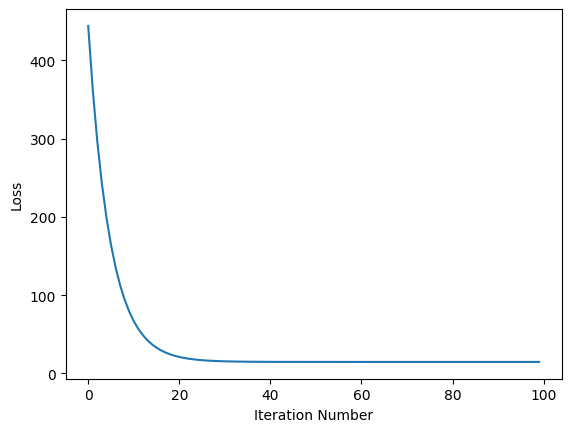

In [51]:
theta = train(X,y)

In [52]:
theta

array([ 4.09455535, 29.01007485])

In [53]:
def predict(X, theta):
    return hypothesis(X, theta)

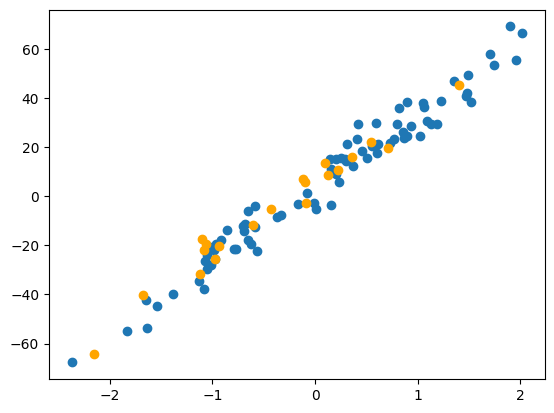

In [55]:
plt.scatter(XT, yT)
plt.scatter(xt, yt, color='orange')
plt.show()

In [56]:
yp=predict(xt, theta)

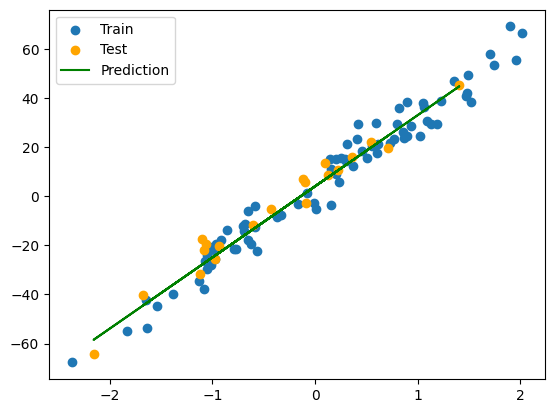

In [57]:
plt.scatter(XT, yT, label='Train')
plt.scatter(xt, yt, color='orange', label='Test')
plt.plot(xt, yp, color='green', label='Prediction')
plt.legend()
plt.show()


In [58]:
y.mean()

4.094664105151001

In [59]:
# Model Evaluation
def r2Score(y, yp):
    ymean = np.mean(y)
    num = np.sum((y - yp) ** 2)
    denom = np.sum((y - ymean) ** 2)
    return 1 - num / denom

In [63]:

r2Score(yt, yp)

0.9644446186777165

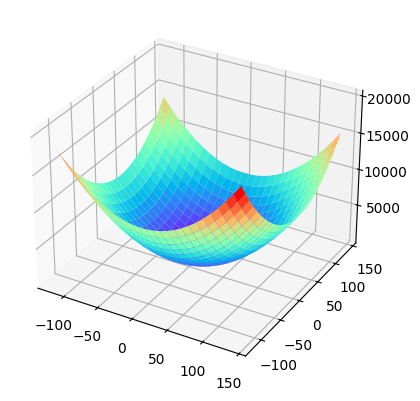

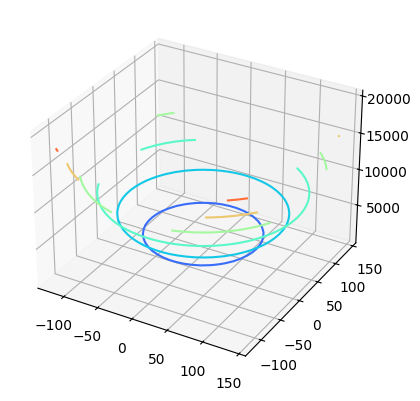

In [64]:

# Visualising the training process 
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')

axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')

axes.contour(T0,T1,J,cmap='rainbow')
plt.show()
